In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import eazy
from glob import glob
print('EAZYCODE = ' + os.getenv('EAZYCODE'))


Couldn't `import tristars`.  Get it from https://github.com/gbrammer/tristars to enable improved blind astrometric matching with triangle asterisms.

EAZYCODE = /Users/Vince.ec/python_git_downloads/eazy-py/eazy-photoz/


In [2]:
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all = 'ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [14]:
params={}

params['VERBOSITY']                 =1.0
params['FILTERS_RES']               =os.getenv('EAZYCODE') + 'filters/FILTER.RES.latest'
params['FILTER_FORMAT']             =1.0
params['SMOOTH_FILTERS']            ='n'
params['SMOOTH_SIGMA']              =100.0
params['TEMPLATES_FILE']            =os.getenv('EAZYCODE') + 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['TEMPLATE_COMBOS']           ='a'
params['NMF_TOLERANCE']             =0.0001
params['WAVELENGTH_FILE']           =os.getenv('EAZYCODE') + 'templates/uvista_nmf/lambda.def'
params['TEMP_ERR_FILE']             =os.getenv('EAZYCODE') + 'templates/uvista_nmf/template_error_10.def'
params['TEMP_ERR_A2']               =0.5
params['SYS_ERR']                   =0.02
params['APPLY_IGM']                 ='y'
params['SCALE_2175_BUMP']           =0.0
params['MW_EBV']                    =0.0103
params['CAT_HAS_EXTCORR']           ='y'
params['DUMP_TEMPLATE_CACHE']       ='n'
params['USE_TEMPLATE_CACHE']        ='n'
params['CACHE_FILE']                ='photz.tempfilt'
params['CATALOG_FILE']              ='/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat'
params['MAGNITUDES']                ='n'
params['NOT_OBS_THRESHOLD']         =-90.0
params['N_MIN_COLORS']              =5.0
params['OUTPUT_DIRECTORY']          ='/Volumes/Vince_CLEAR/eazy_test/'
params['MAIN_OUTPUT_FILE']          ='/Volumes/Vince_CLEAR/eazy_test/goodss_3dhst.v4.4'
params['PRINT_ERRORS']              ='y'
params['CHI2_SCALE']                =1.0
params['VERBOSE_LOG']               ='y'
params['OBS_SED_FILE']              ='n'
params['TEMP_SED_FILE']             ='n'
params['POFZ_FILE']                 ='n'
params['BINARY_OUTPUT']             ='y'
params['APPLY_PRIOR']               ='y'
params['PRIOR_FILE']                =os.getenv('EAZYCODE') + 'templates/prior_F160W_TAO.dat'
params['PRIOR_FILTER']              =205
params['PRIOR_ABZP']                =25.0
params['PRIOR_FLOOR']               =0.01
params['FIX_ZSPEC']                 =False
params['Z_MIN']                     =0.01
params['Z_MAX']                     =6.0
params['Z_STEP']                    =0.01
params['Z_STEP_TYPE']               =1.0
params['GET_ZP_OFFSETS']            ='n'
params['ZP_OFFSET_TOL']             =0.0001
params['REST_FILTERS']              ='---'
params['RF_PADDING']                =1000.0
params['RF_ERRORS']                 ='n'
params['Z_COLUMN']                  ='z_peak'
params['USE_ZSPEC_FOR_REST']        ='y'
params['READ_ZBIN']                 ='n'
params['H0']                        =70.0
params['OMEGA_M']                   =0.3
params['OMEGA_L']                   =0.7

In [15]:
translate_file = '/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Eazy/goodss_3dhst.v4.4.zphot.translate'

os.chdir(os.getenv('EAZYCODE'))

self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)



Read default param file: /Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (103): ESO/vimos_u.res
f_F435W e_F435W (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_F606Wcand e_F606Wcand (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_F606W e_F606W (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_F775W e_F775W (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_F814Wcand e_F814Wcand (239): hst/ACS_update_sep07/wfc_f814w_t81.dat
f_F850LP e_F850LP (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat
f_F850LPcand e_F850LPcand (240): hst/ACS_update_sep07/wfc_f850lp_t81.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J ( 34): ESO/isaac_j.res
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H ( 36): ESO/isaac_h.res
f_Ks e_Ks ( 37): ESO/isaac_ks.res
f_IRAC1 e_IRA

Iteration:  0
4369
Compute best fits
Fit 100.4 s (n_proc=8, NOBJ=4369)
Iteration:  1
4369
Compute best fits
Fit 96.5 s (n_proc=8, NOBJ=4369)
`error_residuals`: force uncertainties to match residuals
Iteration:  2
3234
Compute best fits
Fit 75.8 s (n_proc=8, NOBJ=3234)
`error_residuals`: force uncertainties to match residuals


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Iteration:  3
2966
Compute best fits
Fit 66.7 s (n_proc=8, NOBJ=2966)
`error_residuals`: force uncertainties to match residuals
Iteration:  4
3030
Compute best fits
Fit 67.5 s (n_proc=8, NOBJ=3030)
`error_residuals`: force uncertainties to match residuals
Iteration:  5
3050
Compute best fits
Fit 69.8 s (n_proc=8, NOBJ=3050)
`error_residuals`: force uncertainties to match residuals
Iteration:  6
3047
Compute best fits
Fit 68.9 s (n_proc=8, NOBJ=3047)
`error_residuals`: force uncertainties to match residuals
Iteration:  7
3059
Compute best fits
Fit 69.4 s (n_proc=8, NOBJ=3059)
`error_residuals`: force uncertainties to match residuals
Iteration:  8
3060
Compute best fits
Fit 70.7 s (n_proc=8, NOBJ=3060)
`error_residuals`: force uncertainties to match residuals
Iteration:  9
3058
Compute best fits
Fit 68.4 s (n_proc=8, NOBJ=3058)
`error_residuals`: force uncertainties to match residuals
Iteration:  10
3058
Compute best fits
Fit 68.1 s (n_proc=8, NOBJ=3058)
`error_residuals`: force uncertai

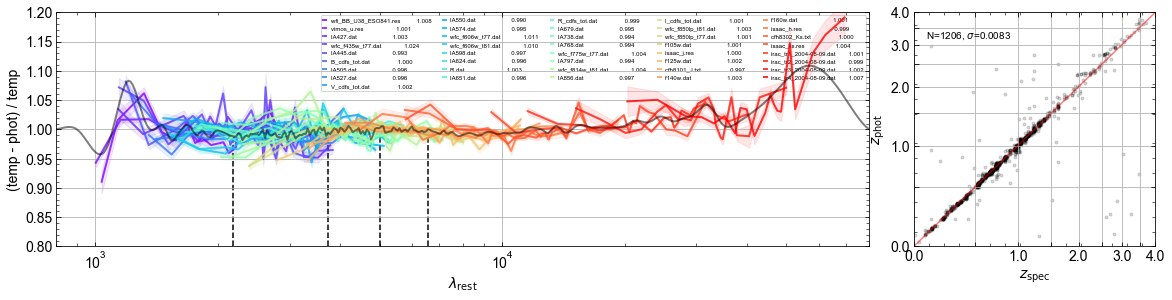

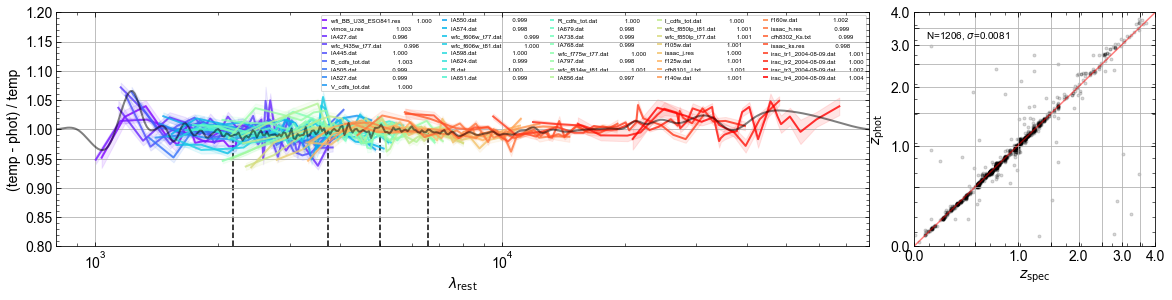

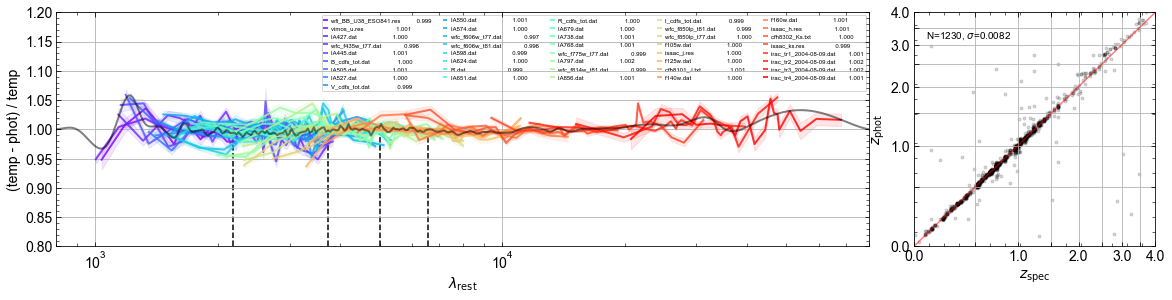

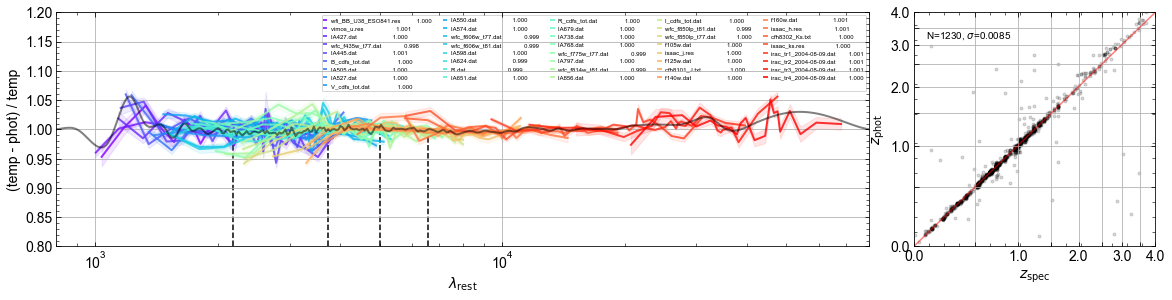

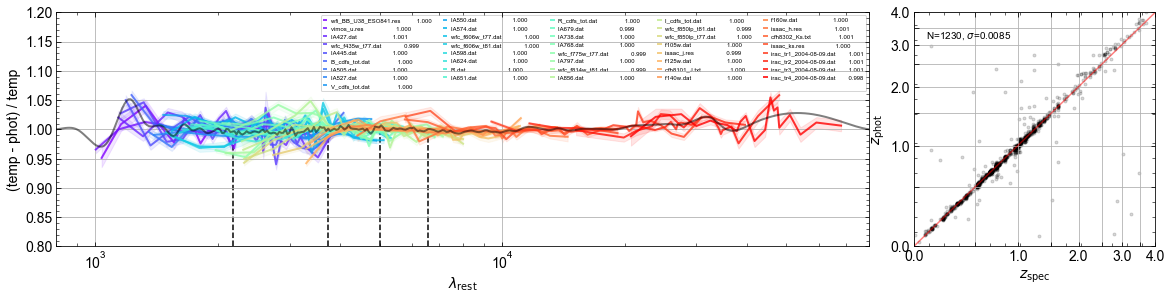

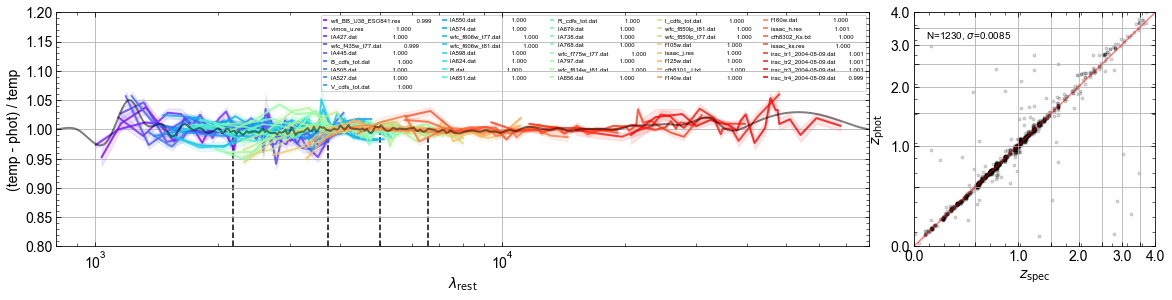

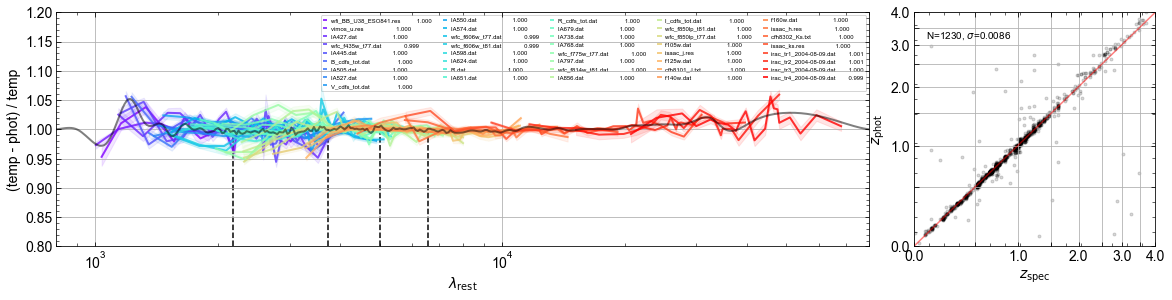

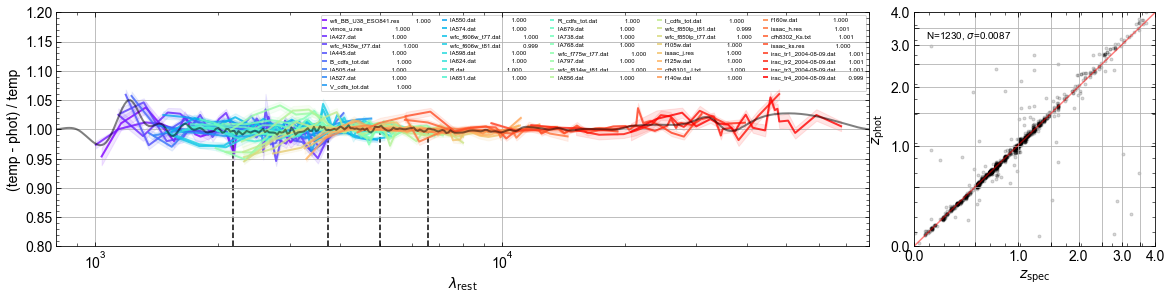

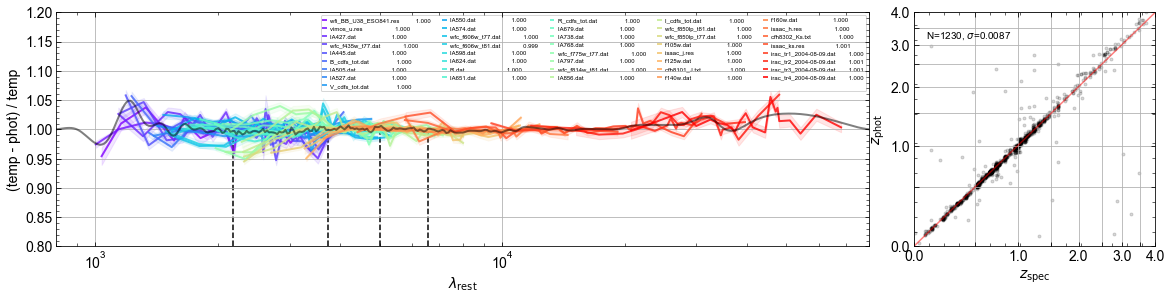

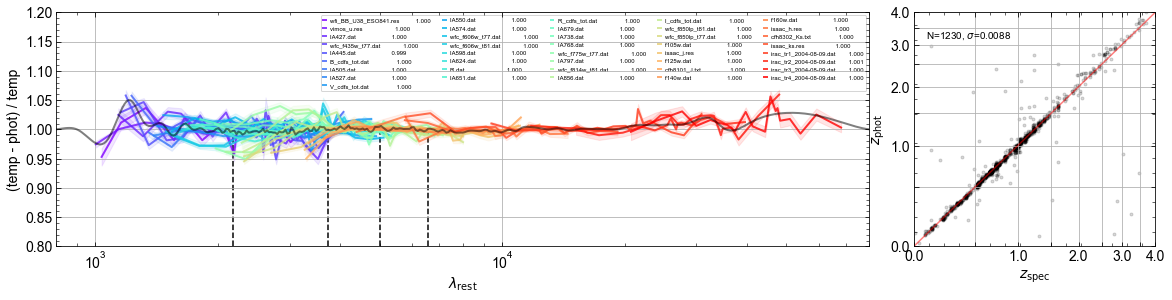

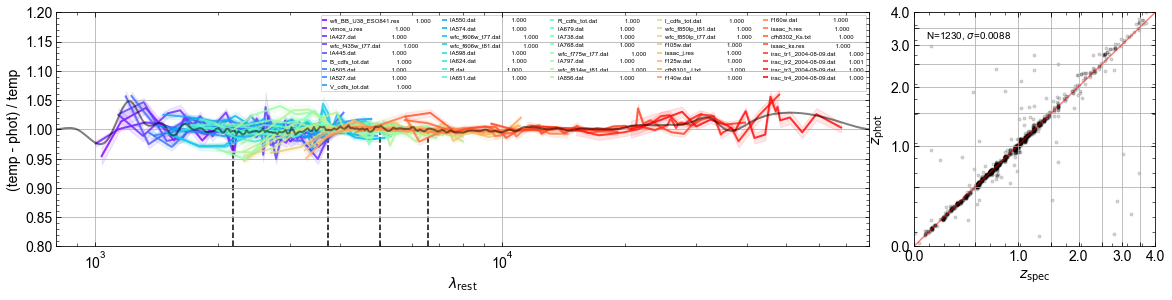

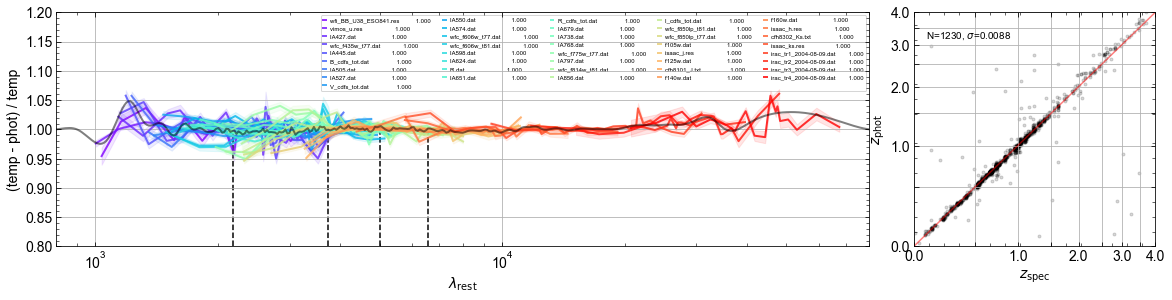

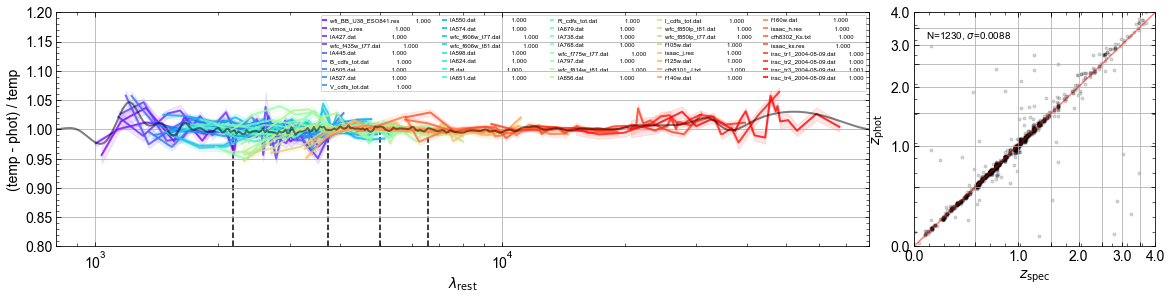

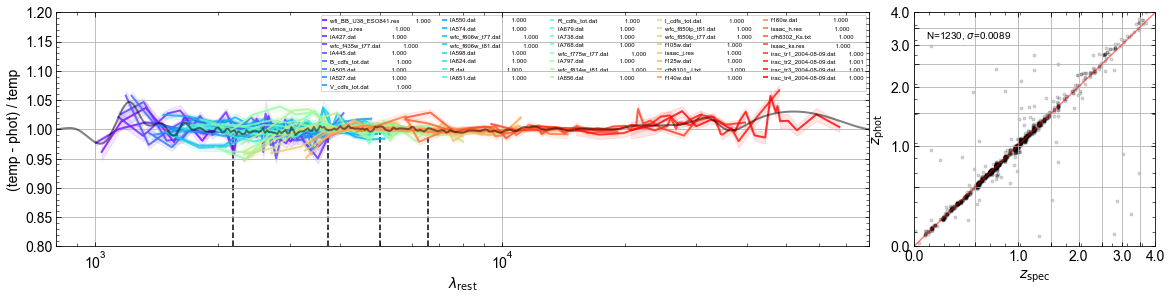

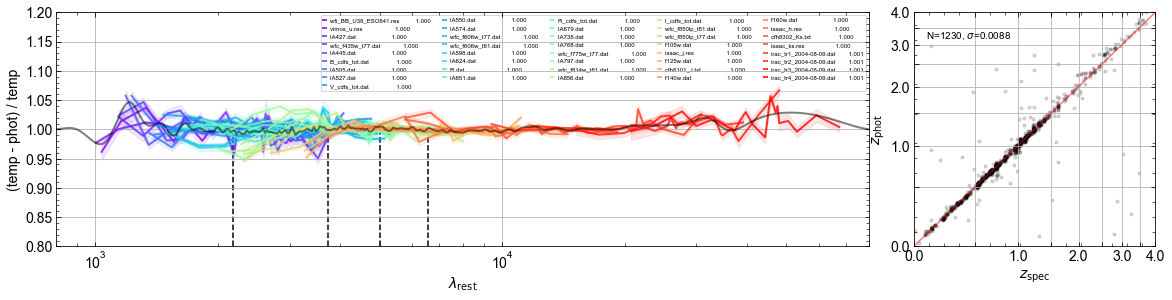

In [16]:
NITER = 15
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    sn = self.fnu/self.efnu
    clip = (sn > 20).sum(axis=1) > 15 # Generally make this higher to ensure reasonable fits
#     clip = sn.T[-3] > 20
    
    print(len(np.where(clip == True)[0]))
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=(iter > 0), 
                              NBIN=NBIN, get_spatial_offset=False)
    


Compute best fits
Fit 718.6 s (n_proc=8, NOBJ=50507)


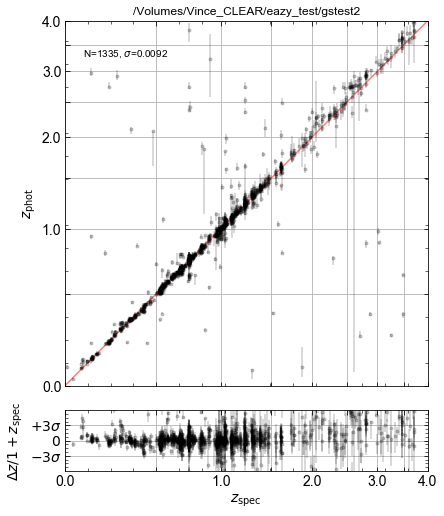

In [30]:

# Turn off error corrections derived above
self.efnu = self.efnu_orig*1

# Full catalog
sample = np.isfinite(self.cat['z_spec'])
self.fit_parallel(self.idx[sample], n_proc=8)
# Show zspec-zphot comparison
fig = self.zphot_zspec()


In [31]:
zout, hdu = self.standard_output(rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True)


Get best fit coeffs & best redshifts
Get parameters (UBVJ=[153, 154, 155, 161], LIR=[8, 1000])
Rest-frame filters: [153, 154, 155, 161]


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/photoz.py:2280: RuntimeWarning: covariance is not positive-semidefinite.
  coeffs_draw[:, ok_temp] = np.random.multivariate_normal(coeffs_i[ok_temp], covar, size=get_err)


Rest-frame filters: [270, 274, 120, 121, 156, 157, 158, 159, 160, 161, 162, 163]


In [60]:
self.show_fit(self.cat['id'][21555], xlim=[0.2, 3], show_components=True)

AttributeError: 'PhotoZ' object has no attribute 'zbest'

In [6]:
fnu_i = np.squeeze(self.fnu[21155, :])*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu[21155,:])*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr


In [79]:
from spec_exam import Gen_spec

In [172]:
Gs = Gen_spec('GND', 21156, 1.253,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500], mdl_err = True,
            phot_errterm = 0.03, decontam = True) 

cleaned


<ErrorbarContainer object of 3 artists>

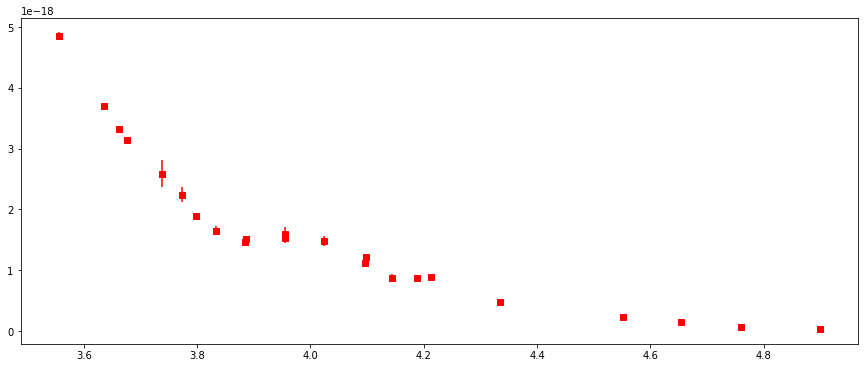

In [12]:
plt.figure(figsize = [15,6])

# plt.errorbar(np.log10(self.lc), (fnu_i*fnu_factor*flam_sed), (efnu_i*fnu_factor*flam_sed), color='k', marker='s', 
#              linestyle='None', label=None, zorder=10)
plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
             linestyle='None', label=None, zorder=10)
# plt.errorbar(np.log10(Gs.Pwv)[Gs.Pflx > 0],Gs.Pflx[Gs.Pflx > 0],Gs.Perr[Gs.Pflx > 0],
#                                  linestyle='None', marker='p', color='#984ea3')

In [99]:
self.f_numbers

array([205, 227, 233, 229, 236, 231, 238, 240, 203, 224, 204, 225, 226,
        18,  19,  20,  21,  46, 115, 116, 117, 118, 202])

In [100]:
Gs.Pnum

array([205., 227., 233.,  46., 229., 115., 236., 116., 231., 117., 238.,
       118., 240., 203., 224., 204., 225., 226.,  18.,  19.,  20.,  21.,
       202.])

In [17]:
fnu_i = np.squeeze(self.fnu)*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu)*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr

nwv=self.lc
nfl=fnu_i*fnu_factor*flam_sed
ner=efnu_i*fnu_factor*flam_sed

In [18]:
def extract_phot(catalog, idx):

    Pwv = []
    Pfl = []
    Per = []
    Pnum = []
    
    for ii in range(len(catalog.f_numbers)):
        Pwv.append(nwv[ii])
        Pfl.append(nfl[idx - 1][ii])            
        Per.append(ner[idx - 1][ii])            
        Pnum.append(catalog.f_numbers[ii])
                
    return np.array([Pwv,Pfl,Per,Pnum])

In [19]:
pwv,pfl,per,pnum = extract_phot(self, 21156)

<ErrorbarContainer object of 3 artists>

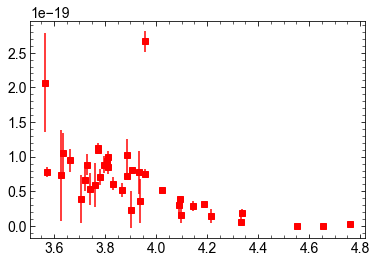

In [20]:
plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
             linestyle='None', label=None, zorder=10)

In [12]:
np.save('/Users/vestrada/Github/Cluster_and_field/Casey_data/phot/GND_45068_phot.npy', [pwv,pfl,per,pnum])

In [21]:
os.chdir('/Users/Vince.ec/Github/Cluster_and_field/scripts')
# GS_samp = pd.read_pickle('../dataframes/galaxy_frames/GS_cnd.pkl')
G_new = pd.read_pickle('../dataframes/galaxy_frames/massMetal_GSD_full.pkl')


In [22]:
# G_new.id.values
Gid = G_new.ID.values

In [23]:
# for i in range(len(G_new.id.values)):
#     print(G_new.id.values[i])
#     pwv,pfl,per,pnum = extract_phot(self, G_new.id.values[i])
#     np.save('../phot/GND_{0}_phot.npy'.format(G_new.id.values[i]), [pwv,pfl,per,pnum])

for i in range(len(Gid)):
    print(Gid[i])
    pwv,pfl,per,pnum = extract_phot(self, Gid[i])
    np.save('../phot/GSD_{}_phot'.format(Gid[i]), [pwv,pfl,per,pnum],)

41053
40742
36997
37085
44824
47770
45633
47059
38912
39837
39376
42455
37827
40108
44871
44674
46130
37001
45531
45495
38135
38584
46938
42166
48318
41886
43105
48716
44556
45313
42890
48417
44783
42758
48652
42798
48706
46515
49682
47348
47399
47954
43403
47214
48918
26021
30572
25003
30807
26550
21986
30443
29293
20651
29499
24851
27867
29256
25641
30427
28794
21740
25465
22793
29815
31311
24817
24803
25197
28878
26739
24365
26406
29816
22723
25778
22291
29349
24615
29122
23370
28704
39253
41218
41190
39603
38849
37485
38616
39807
43114
40759
41266
41274
44604
42253
39847
39038
40078
40192
40776
38398
